In [0]:
from google.colab import files
files.upload()

In [1]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

Using TensorFlow backend.


In [0]:
def get_image_data(num_training=63000, num_validation=1000, num_test=10000):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "test-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    
    data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
    X_train, y_train, X_test, y_test = data['data'][:80000],data_label[:80000],data['data'][80000:],data_label[80000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
def calculate_error(label1,label2):

  square_error = np.square(np.array(label1) - np.array(label2))

  error_sum=np.sum(square_error)/square_error.size

  return np.sqrt(error_sum) 

In [3]:


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
y_train=y_train.reshape(-1,42)
y_val=y_val.reshape(-1,42)
y_test=y_test.reshape(-1,42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
        input_shape=(32, 32, 3)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=42,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=30,
)

Train data shape:  (63000, 32, 32, 3)
Train labels shape:  (63000, 42)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 42)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(32, 32, 3..., kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Dense` call to the Keras 2 API:

Epoch 1/30
63000/63000 [==============================] - 9s 139us/step - loss: 18.7178
Epoch 2/30
63000/63000 [==============================] - 8s 120us/step - loss: 12.9541
Epoch 3/30
63000/63000 [==============================] - 8s 126us/step - loss: 11.9878
Epoch 4/30
39600/63000 [=================>............] - ETA: 2s - loss: 11.3937

63000/63000 [==============================] - 8s 120us/step - loss: 11.3130
Epoch 5/30
63000/63000 [==============================] - 8s 121us/step - loss: 10.8706
Epoch 6/30
63000/63000 [==============================] - 8s 121us/step - loss: 10.5228
Epoch 7/30
54000/63000 [========================>.....] - ETA: 1s - loss: 10.2601

63000/63000 [==============================] - 8s 127us/step - loss: 10.2650
Epoch 8/30
63000/63000 [==============================] - 8s 122us/step - loss: 10.0271
Epoch 9/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.9021
Epoch 10/30
59200/63000 [===========================>..] - ETA: 0s - loss: 9.8219

63000/63000 [==============================] - 8s 121us/step - loss: 9.8253
Epoch 11/30
63000/63000 [==============================] - 8s 125us/step - loss: 9.7595
Epoch 12/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.7191
Epoch 13/30
60700/63000 [===========================>..] - ETA: 0s - loss: 9.6291

63000/63000 [==============================] - 8s 121us/step - loss: 9.6323
Epoch 14/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.6015
Epoch 15/30
63000/63000 [==============================] - 8s 127us/step - loss: 9.5351
Epoch 16/30
59500/63000 [===========================>..] - ETA: 0s - loss: 9.5129

63000/63000 [==============================] - 8s 121us/step - loss: 9.5274
Epoch 17/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.4822
Epoch 18/30
63000/63000 [==============================] - 8s 120us/step - loss: 9.4122
Epoch 19/30
59400/63000 [===========================>..] - ETA: 0s - loss: 9.4038

63000/63000 [==============================] - 8s 126us/step - loss: 9.3967
Epoch 20/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.3887
Epoch 21/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.3278
Epoch 22/30
60700/63000 [===========================>..] - ETA: 0s - loss: 9.2715

63000/63000 [==============================] - 8s 121us/step - loss: 9.2681
Epoch 23/30
63000/63000 [==============================] - 8s 126us/step - loss: 9.2821
Epoch 24/30
63000/63000 [==============================] - 8s 120us/step - loss: 9.2596
Epoch 25/30
59800/63000 [===========================>..] - ETA: 0s - loss: 9.2227

63000/63000 [==============================] - 8s 122us/step - loss: 9.2324
Epoch 26/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.1998
Epoch 27/30
63000/63000 [==============================] - 8s 127us/step - loss: 9.1771
Epoch 28/30
59700/63000 [===========================>..] - ETA: 0s - loss: 9.1599

63000/63000 [==============================] - 8s 121us/step - loss: 9.1562
Epoch 29/30
63000/63000 [==============================] - 8s 122us/step - loss: 9.1178
Epoch 30/30
63000/63000 [==============================] - 8s 120us/step - loss: 9.1308


In [4]:
# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
X_train, y_train, X_test, y_test = data['data'][:80000],data_label[:80000],data['data'][80000:],data_label[80000:]



sample = np.array(X_train, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_train = model.predict(sample).reshape(-1, 21, 2)

sample = np.array(X_val, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_val = model.predict(sample)

sample = np.array(X_test, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_test = model.predict(sample).reshape(-1, 21, 2)


print("Train set pixels error: %s"%(calculate_error(y_train,predictions_train)))
print("Validation set pixels error: %s" % (calculate_error(y_val, predictions_val)))
print("Test set pixels error: %s" % (calculate_error(y_test, predictions_test)))


Train set pixels error: 3.0427005438002155
Validation set pixels error: 3.2768134831717886
Test set pixels error: 3.215803709395066


Predicting the next hand posture


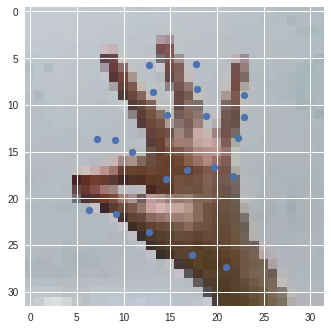

Correct the next hand posture


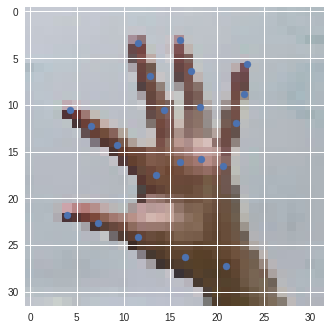

In [29]:

print("Predicting the next hand posture")

demo_index=1000
# demo_index=1005
# demo_index=1015

demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
# plt.imshow(np.ones((32,32,3)))
plt.scatter(out[:, 1], out[:, 0])
plt.show()

print("Correct the next hand posture")
demo_index=68805
# demo_index=47624
# demo_index=36992


demo = data['data'][demo_index]

# data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
# print(data_label.shape)
plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
# plt.imshow(np.ones((32,32,3)))
plt.scatter(data['label'][demo_index][ :,1], data['label'][demo_index][:,0])
# plt.scatter(out[:, 1], out[:, 0])
plt.show()

Predicting the next hand posture


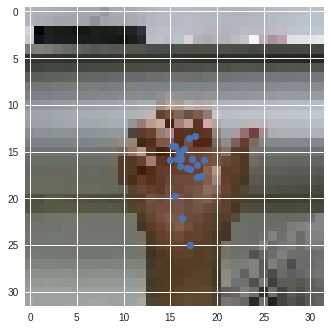

Correct the next hand posture


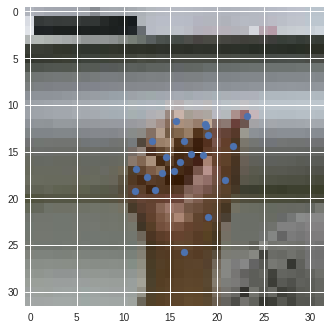

In [30]:
print("Predicting the next hand posture")

# demo_index=1000
demo_index=1005
# demo_index=1015

demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
# plt.imshow(np.ones((32,32,3)))
plt.scatter(out[:, 1], out[:, 0])
plt.show()

print("Correct the next hand posture")
# demo_index=68805
demo_index=47624
# demo_index=36992


demo = data['data'][demo_index]

# data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
# print(data_label.shape)
plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
# plt.imshow(np.ones((32,32,3)))
plt.scatter(data['label'][demo_index][ :,1], data['label'][demo_index][:,0])
# plt.scatter(out[:, 1], out[:, 0])
plt.show()

Predicting the next hand posture


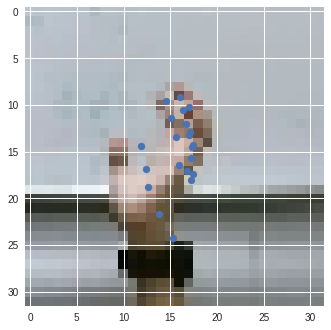

Correct the next hand posture


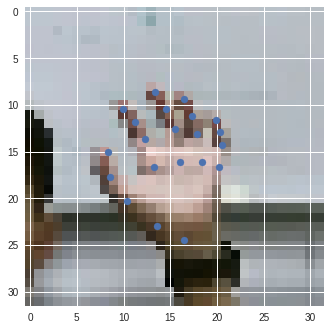

In [31]:
print("Predicting the next hand posture")

# demo_index=1000
# demo_index=1005
demo_index=1015

demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
# plt.imshow(np.ones((32,32,3)))
plt.scatter(out[:, 1], out[:, 0])
plt.show()

print("Correct the next hand posture")
# demo_index=68805
# demo_index=47624
demo_index=36992


demo = data['data'][demo_index]

# data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
# print(data_label.shape)
plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
# plt.imshow(np.ones((32,32,3)))
plt.scatter(data['label'][demo_index][ :,1], data['label'][demo_index][:,0])
# plt.scatter(out[:, 1], out[:, 0])
plt.show()